## Q1

In [5]:
G = [214, 532, 623, 545, 871]

#Storage cost of each day C
C = [95, 65, 121, 79, 400]

#Maximum capacity of each transmitter R
R = [350, 250, 200, 150]

#Transmitter cost per kWh 
T = [200, 136,95,78]

m = []
b = []
a = [[0,0,0,0,0]]


for i in range(4):
    m_=[]
    b_=[]
    a_=[]
    for j in range(4):
        if i == 0:
            m_.append(8*T[j]/(3*R[j]))
            b_.append(0)
            a_.append(0.25*R[j])
        elif i == 1:
            m_.append(4*T[j]/(3*R[j]))
            b_.append(T[j]/3)
            a_.append(0.5*R[j])
        elif i == 2:
            m_.append(4*T[j]/(5*R[j]))
            b_.append(0.6*T[j])
            a_.append(0.75*R[j])
        else:
            m_.append(8*T[j]/(5*R[j]))
            b_.append(0)
            a_.append(R[j])
    m.append(m_)
    b.append(b_)
    a.append(a_)

nb = [b,b,b,b,b]
nm = [m,m,m,m,m]


In [6]:
from gurobipy import *
import numpy as np
#Model Parameters
#Power generated per day G

#Create the model
mod = Model('cost')

days=range(len(G))
trans=range(len(R))

#Create decision variables
#Storage power per day decision variables s[5]
s= mod.addVars(5, vtype=GRB.INTEGER, obj = C,name='powerleftperday')

#Transmitted power per day decison variables x[4,5]
x= mod.addVars(4, 5, vtype=GRB.INTEGER, obj = 0,name='transperday')

#Transmitter operation on each day decision variable y[4,5]
y= mod.addVars(4, 5, vtype=GRB.BINARY, obj = 0, name='trans')

#h = 1 if x belongs to [a[i-1,j],a[i,j]]
h= mod.addVars(5,4,4, vtype=GRB.BINARY, obj = nb, name='h')

#w = x if x belongs to [a[i-1,j],a[i,j]]
w= mod.addVars(5,4,4, vtype=GRB.CONTINUOUS, obj = nm, name='w')

#Set objective is to minimize cost
mod.modelSense = GRB.MINIMIZE

#Add constraint:
mod.addConstrs((h.sum(d,'*',t) ==1  for t in trans for d in days),'c4')
mod.addConstrs((w.sum(d,'*',t) ==x[t,d]  for t in trans for d in days),'c5')

mod.addConstrs((w[d,i,t]<= a[i+1][t]*h[d,i,t] for i in range(4) for t in trans for d in days),'c6')
mod.addConstrs((w[d,i,t]>= a[i][t]*h[d,i,t] for i in range(4) for t in trans for d in days), 'c7')

#Add constraint: power transmitted by each transmitter cannot exceed the maximum capacity of the transmitter
mod.addConstrs((x[t,d]<=R[t]*y[t,d] for t in trans for d in days), 'c0')

#Add constraint: for the first day transmitted power equals to generated - stored
mod.addConstr((x[0,0]+x[1,0]+x[2,0]+x[3,0] == G[0] - s[0]), 'c2')

#Add constraint: power transmitted at day[d] equals to G[d]+s[d-1]-s[d]
mod.addConstrs((x.sum('*',d) == G[d] + s[d-1] -s[d] for d in range(1,5) ),'c3')

#Add constraint: transmitter cannot operate three days in a row
for i in range(3):
    mod.addConstrs(((y[r,i]+y[r,i+1]+y[r,i+2])<=2 for r in trans), 'c1')

mod.optimize()
mod.write('hw3.lp')
for v in mod.getVars():
    if v.x != 0:
        print('%s %g' % (v.varName, v.x))

print('Obj: %g' % mod.objVal)

Gurobi Optimizer version 9.0.0 build v9.0.0rc2 (mac64)
Optimize a model with 237 rows, 205 columns and 585 nonzeros
Model fingerprint: 0x3b6146ed
Variable types: 80 continuous, 125 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+02]
  Objective range  [4e-01, 4e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+02]
Found heuristic solution: objective 1499675.0000
Presolve removed 43 rows and 24 columns
Presolve time: 0.00s
Presolved: 194 rows, 181 columns, 578 nonzeros
Variable types: 78 continuous, 103 integer (79 binary)

Root relaxation: objective 5.782766e+04, 130 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 57827.6608    0   18 1499675.00 57827.6608  96.1%     -    0s
H    0     0                    230992.64137 57827.6608  75.0%     -    0s
H    0     0                    110520.06705 57827.66

## Q2

In [92]:
import HW3_Q2_Data14 as data_1
from gurobipy import *
import numpy as np
import gurobipy as grb

In [93]:
node = data_1.n
clubs = data_1.clubs
conflicts = data_1.conflicts
gpa = data_1.GPA
Dist = data_1.Dist
dist = []
for d in Dist:
    lens = []
    for x in d:
        lens.append(-x)
    dist.append(lens)
clubs

[[0, 1, 2], [3, 4], [5, 6, 7], [8, 9, 10], [11, 12]]

In [94]:
GPA = np.zeros([5,13]) 
CLUBS = np.zeros([5,13])
for i in range(len(clubs)):
    for j in clubs[i]:
        GPA[i,j]=gpa[j]
        CLUBS[i,j]=1

GPA=list(list(x) for x in GPA)
CLUBS=list(list(x) for x in CLUBS)
CLUBS

[[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]]

In [131]:
from itertools import combinations
subset = []
for i in range(3,6):
    subset.append([c for c in  combinations(range(13), i)])

I = []    
for sub in subset:
    for i in sub:
        I.append(i)
I = [list(x) for x in I]

In [133]:
model = Model('cost')

#cut_plane = [[1,3,8],[2,8,3],[7,10,11],[1,4,7,10,11]]

club= range(len(clubs))
students= range(len(gpa))
nodes= range(node)

#
x= model.addVars(5, 13, vtype=GRB.BINARY, obj = GPA, name='student')

#Transmitter operation on each day decision variable y[4,5]
z= model.addVars(14, vtype=GRB.BINARY, obj = 0, name='nodes')

#h = 1 if x belongs to [a[i-1,j],a[i,j]]
y= model.addVars(14,14, vtype=GRB.BINARY, obj = dist, name='edges')

#Set objective is to minimize cost
model.modelSense = GRB.MAXIMIZE

#1b
for j in club:
    subclub=clubs[j]
    for i in range(13):
        if i not in subclub:
            model.addConstr((x[j,i]==0),'c1')
model.addConstrs((x.sum(l,'*')<=1 for l in club),'1b')

#model.addConstrs((x.sum(l,'*')<=1 for l in clubs),'1b')
model.addConstrs((x.sum('*',s)== z[s] for s in students),'1c')
model.addConstrs((z[i]+z[j]<=1 for (i, j) in conflicts),'1d')

for i in nodes:
    for j in nodes:
        model.addConstr((y[i,j]+y[j,i]<=1),'1ee')

model.addConstrs((y.sum('*',i)==z[i] for i in nodes),'1e')
model.addConstrs((y.sum(i,'*')==z[i] for i in nodes),'1ee')

model.addConstr((z[13]==1),'1g')

for subset in I:
    for i in subset:
        nsub = [x for x in subset if x!=i]
        model.addConstr((grb.quicksum(y[i,j] for j in subset for i in subset)<= grb.quicksum(z[k] for k in nsub)),'1f')

model.optimize()
                         
#model.write('hw3_2.lp')
for v in model.getVars():
    if v.x != 0:
        print('%s %g' % (v.varName, v.x))

print('Obj: %g' % model.objVal)

Gurobi Optimizer version 9.0.0 build v9.0.0rc2 (mac64)
Optimize a model with 10451 rows, 275 columns and 251393 nonzeros
Model fingerprint: 0x51234582
Variable types: 0 continuous, 275 integer (275 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 6e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 209 rows and 108 columns
Presolve time: 0.60s
Presolved: 10242 rows, 167 columns, 174453 nonzeros
Variable types: 0 continuous, 167 integer (167 binary)
Found heuristic solution: objective -6.9100000
Found heuristic solution: objective -6.7800000
Found heuristic solution: objective -2.0300000

Root relaxation: objective 8.645556e+00, 125 iterations, 0.05 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    8.64556    0   37   -2.03000    8.64556   526%     -    0s
H    0     0             

## Q3-a

In [416]:
#Function to get feasible tours
def feasible_tours(G, consider_time=False, capacity = 9):
    tours = list(nx.simple_cycles(G))
    delete = []
    delete_time = []
    delete_cap =[]
    
    #If tour does not start at 0, remove the tour
    for i in range(len(tours)):
        if tours[i][0]!=0:
            delete.append(tours[i])

    for tour in delete:
        if tour in tours:
            tours.remove(tour)
    
    #Add 0 at the end of tour, so it has to go back to the start point
    for tour in tours:
        tour.insert(len(tour),0)
    
    #If consider time window
    if consider_time:
        for tour in tours:
            time_check = 0
            for i in range(len(tour)-1):
        #check first two
                start = tour[i]
                end = tour[i+1]
                time_start = time[end][0]
                time_end = time[end][1]
                wt = G[start][end]['weight']
                time_check += wt
                check = (time_check >= time_start and time_check<=time_end)
                if not check:
                    delete_time.append(tour)
    
        for tour in delete_time:
            if tour in tours:
                tours.remove(tour)
    
    #If consider capacity
    for tour in tours:
        if (len(tour)-2) > capacity:
            delete_cap.append(tour)
    for tour in delete_cap:
            if tour in tours:
                tours.remove(tour)
    
    return tours

In [417]:
def count_time(tours):
    time_cost = []
    for tour in tours:
        time_check = 0
        for i in range(len(tour)-1):
        #check first two
            start = tour[i]
            end = tour[i+1]
            time_start = time[end][0]
            time_end = time[end][1]
            wt = G[start][end]['weight']
            time_check += wt
        time_cost.append(time_check)
    return time_cost

In [418]:
#3
import networkx as nx
G = nx.DiGraph()
nodes = [0,1,2,3,4,5,6,7]
G.add_nodes_from(nodes)
edges = [(0,1,6),(0,2,7),(0,3,7),(0,4,7),(0,6,4),(0,7,2),
         (1,2,4),(1,4,11),(1,7,3),
         (2,3,3),(2,5,2),(2,7,7),
         (3,5,6),(3,6,4),(4,5,9),
         (5,6,2),
         (1,0,6),(2,0,7),(3,0,7),(4,0,7),(6,0,4),(7,0,2),
         (2,1,4),(4,1,11),(7,1,3),
         (3,2,3),(5,2,2),(7,2,7),
         (5,3,6),(6,3,4),(5,4,9),
         (6,5,2)]
G.add_weighted_edges_from(edges)
time = [[0,100],[3,13],[7,14],[7,18],[8,25],[5,18],[3,11],[4,20]]

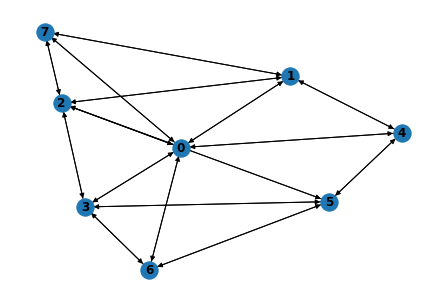

In [419]:
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

## Q3-b

In [420]:
import numpy as np
feasible_3b = feasible_tours(G, consider_time=False)

tours_array = np.zeros([len(feasible_3b),7])
for i in range(len(feasible_3b)):
    for j in range(1,8):
        if j in feasible_3b[i]:
            tours_array[i,j-1]=1
tours_list = list(list(tour) for tour in tours_array)
time_weight = count_time(feasible_3b)

In [421]:
from gurobipy import *
import numpy as np
#Model Parameters
#Power generated per day G

#Create the model
m = Model('tour_cost')

tour=range(len(tours_list))

#Create decision variables
#x[t] = 1 if tour t is selected
x= m.addVars(tour, vtype=GRB.BINARY, obj = time_weight, name='tour_selected')
#y= m.addVars(7, vtype=GRB.INTEGER,obj=0, name='node sum')

#Set objective is to minimize weight
m.modelSense = GRB.MINIMIZE

#Add constraints
m.addConstrs((x.sum('*')<=3 for t in tour),'c1')


m.addConstrs((grb.quicksum(tours_list[t][j]*x[t] for t in tour)>=1 for j in range(7)),'c2')
    
m.optimize()

for v in m.getVars():
    if v.x!=0:
        print('%s %g' % (v.varName, v.x))
print('Obj: %g' % m.objVal)

Gurobi Optimizer version 9.0.0 build v9.0.0rc2 (mac64)
Optimize a model with 251 rows, 244 columns and 60704 nonzeros
Model fingerprint: 0xb660e7ed
Variable types: 0 continuous, 244 integer (244 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+00, 5e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Found heuristic solution: objective 72.0000000
Presolve removed 243 rows and 218 columns
Presolve time: 0.02s
Presolved: 8 rows, 26 columns, 116 nonzeros
Found heuristic solution: objective 34.0000000
Variable types: 0 continuous, 26 integer (26 binary)

Root relaxation: cutoff, 8 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0     cutoff    0        34.00000   34.00000  0.00%     -    0s

Explored 0 nodes (8 simplex iterations) in 0.03 seconds
Thread count was 16 (of 16 available processor

## 3-c

In [422]:
feasible_3c = feasible_tours(G, consider_time=True)

tours_array = np.zeros([len(feasible_3c),7])
for i in range(len(feasible_3c)):
    for j in range(1,8):
        if j in feasible_3c[i]:
            tours_array[i,j-1]=1
tours_list = list(list(tour) for tour in tours_array)
time_weight = count_time(feasible_3c)

In [423]:
#Create the model
mm = Model('tour_cost')

tour=range(len(tours_list))

#Create decision variables
#x[t] = 1 if tour t is selected
x= mm.addVars(tour, vtype=GRB.BINARY, obj = time_weight, name='tour_selected')
#y= m.addVars(7, vtype=GRB.INTEGER,obj=0, name='node sum')

#Set objective is to minimize weight
mm.modelSense = GRB.MINIMIZE

#Add constraints
mm.addConstrs((x.sum('*')<=3 for t in tour),'c1')


mm.addConstrs((grb.quicksum(tours_list[t][j]*x[t] for t in tour)>=1 for j in range(7)),'c2')
    
mm.optimize()

for v in mm.getVars():
    if v.x !=0:
        print('%s %g' % (v.varName, v.x))

print('Obj: %g' % mm.objVal)

Gurobi Optimizer version 9.0.0 build v9.0.0rc2 (mac64)
Optimize a model with 47 rows, 40 columns and 1720 nonzeros
Model fingerprint: 0x1a83d2d4
Variable types: 0 continuous, 40 integer (40 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e+00, 3e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Found heuristic solution: objective 58.0000000
Presolve removed 39 rows and 19 columns
Presolve time: 0.00s
Presolved: 8 rows, 21 columns, 85 nonzeros
Found heuristic solution: objective 51.0000000
Variable types: 0 continuous, 21 integer (21 binary)

Root relaxation: objective 4.000000e+01, 8 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      40.0000000   40.00000  0.00%     -    0s

Explored 0 nodes (8 simplex iterations) in 0.01 seconds
Thread count was 16 (of 16 available p

In [424]:
feasible_3c[10],feasible_3c[33]

([0, 6, 3, 2, 5, 4, 0], [0, 1, 7, 0])

## 3-d

In [428]:
feasible_3d = feasible_tours(G, consider_time=True, capacity=3)

tours_array = np.zeros([len(feasible_3d),7])
for i in range(len(feasible_3d)):
    for j in range(1,8):
        if j in feasible_3d[i]:
            tours_array[i,j-1]=1
tours_list = list(list(tour) for tour in tours_array)
time_weight = count_time(feasible_3d)

In [426]:
#Create the model
m_2 = Model('tour_cost')

tour=range(len(tours_list))

#Create decision variables
#x[t] = 1 if tour t is selected
x= m_2.addVars(tour, vtype=GRB.BINARY, obj = time_weight, name='tour_selected')
#y= m.addVars(7, vtype=GRB.INTEGER,obj=0, name='node sum')

#Set objective is to minimize weight
m_2.modelSense = GRB.MINIMIZE

#Add constraints
m_2.addConstrs((x.sum('*')<=3 for t in tour),'c1')


m_2.addConstrs((grb.quicksum(tours_list[t][j]*x[t] for t in tour)>=1 for j in range(7)),'c2')
    
m_2.optimize()

for v in m_2.getVars():
    if v.x !=0:
        print('%s %g' % (v.varName, v.x))

print('Obj: %g' % m_2.objVal)

Gurobi Optimizer version 9.0.0 build v9.0.0rc2 (mac64)
Optimize a model with 33 rows, 26 columns and 737 nonzeros
Model fingerprint: 0xcef42565
Variable types: 0 continuous, 26 integer (26 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e+00, 3e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Presolve removed 25 rows and 8 columns
Presolve time: 0.00s
Presolved: 8 rows, 18 columns, 62 nonzeros
Variable types: 0 continuous, 18 integer (18 binary)
Found heuristic solution: objective 53.0000000

Root relaxation: objective 4.700000e+01, 7 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      50.0000000   50.00000  0.00%     -    0s

Explored 0 nodes (11 simplex iterations) in 0.01 seconds
Thread count was 16 (of 16 available processors)

Solution count 2: 50 53 

Optimal so

In [427]:
feasible_3d[0],feasible_3d[19],feasible_3d[21]

([0, 6, 5, 4, 0], [0, 2, 3, 0], [0, 1, 7, 0])